# Chart, Marks and Encodings

**Learning Objective:** Understand how to create a basic data visualization with Altair using a chart, marks and visual encodings.

## Imports

In [1]:
from IPython.display import Image

In [1]:
import altair as alt
alt.enable_mime_rendering() # needed for jupyterlab/nteract

## Dataset

Again, let's load the cars dataset and remind ourselves of its structure:

In [2]:
cars = alt.load_dataset('cars')

In [3]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


## Overview

The first library we will use for data visualization is [Altair](https://altair-viz.github.io/index.html). Altair is a *declarative statistical visualization* library that sits on top of [d3](https://d3js.org/), [Vega](https://vega.github.io/) and [Vega-Lite](https://vega.github.io/). By *statistical visualization* we mean that the dataset passed to Altair will be *tidy data* and the variables (columns) are mapped to visual properties by grouping rows together based on values in certain columns (more on that later).

To create a visualization in Altair, you need to do three things:

1. Pass tidy data to a `Chart` object
2. Pick a mark type with a method such as `.mark_point()`
3. Specify one or more visual encodings using the `.encode()` method

Let's look at an example with the cars dataset and then look more closely at these three things:

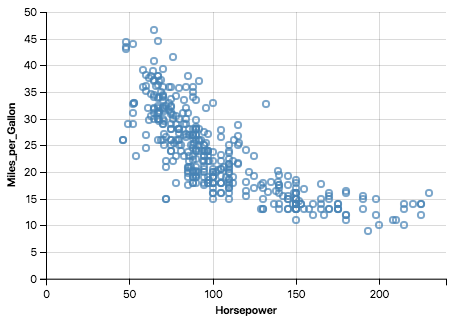

In [4]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon'
)

As this example shows, all Altair visualizations follow the same template:

![MarksEncoding](images/marks_encoding.png)


As mentioned above, this template requires you to specify three things:

1. The data (blue)
3. The mark type (green)
2. The visual encodings (orange)

Regardless of your dataset and visualization, you will always follow this template. There are additional transformations and customizations you can add to the template, but its basic form will remain the same. Let's look at marks and encodings in more detail.

## Marks

After passing in the data, you need to specify the mark type. This corresponds to the green section of the visualization template:

![MarksEncoding](images/marks_encoding.png)

Altair supports the following mark types:

![](images/marks.png)

With these nine mark types you can create a wide range of data visualizations. Above, we have seen how the `point` mark can be used to create a two-dimensional scatter plot. Here is an example of the `tick` mark, which is useful for showing the distribution of a quantitative variable:

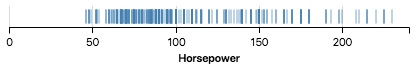

In [5]:
alt.Chart(cars).mark_tick().encode(
    x='Horsepower'
)

The `line` mark draws a line between the individual data points:

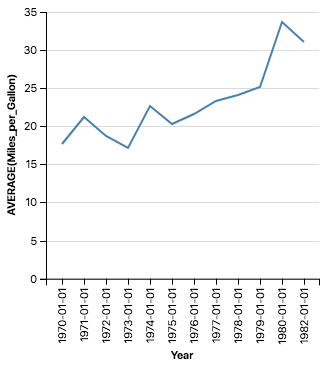

In [6]:
alt.Chart(cars).mark_line().encode(
    x="Year",
    y="average(Miles_per_Gallon)",
)

The `bar` mark is used for bar charts and histograms. The `mark_type()` methods also accept keyword arguments to customize the marks:

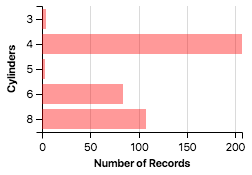

In [7]:
alt.Chart(cars).mark_bar(color='red', opacity=0.4).encode(
    x="count(*)",
    y="Cylinders:O"
)

The documentation for the top-level `Chart` object and its methods can be found in the [Altair API Reference](https://altair-viz.github.io/API.html#top-level-objects). We will introduce the other mark types after covering visual encodings.

## Encodings

Lastly, you must specify the *visual encodings* or *encodings* for short. This corresponds to the orange portion of the visualization template:

![MarksEncoding](images/marks_encoding.png)

**A *visual encoding* is a mapping between a column of your `DataFrame` and a visual property (x, y, size, shape, color).** Each visual property is called a *channel* or *channel encoding*. These encodings can be specified in two formats. In the first format, you pass the encodings using keyword arguments:

![](images/encodings1.png)

As we have seen before, the `x` and `y` channels give the horizontal and vertical position of the mark. The `color`, `shape` and `size` control the color, shape and size of the marks respectively:

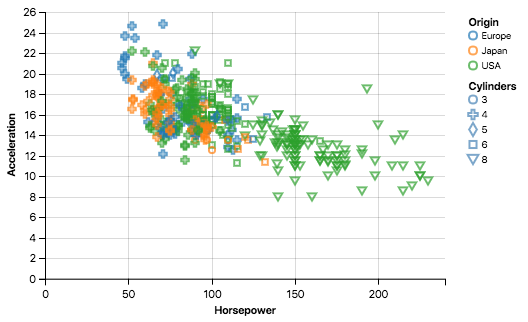

In [8]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Acceleration',
    color='Origin',
    shape='Cylinders'
)

The `column` and `row` channels allow you to create a grid of separate sub-charts, with common axes:

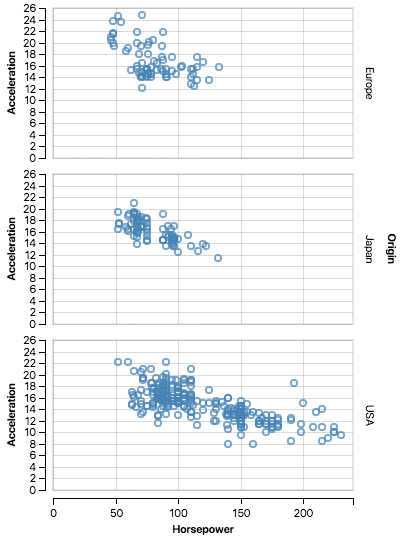

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Acceleration',
    row='Origin'
).configure_cell(width=300, height=150)

In the second format, you pass a channel object:

![](images/encodings2.png)

This is useful if you want to customize the visual encoding with optional arguments:

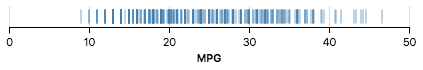

In [11]:
alt.Chart(cars).mark_tick().encode(
    alt.X('Miles_per_Gallon', title="MPG")
)

Documentation about the full set of arguments and options that can be passed to the channel objects or `.mark_type()` methods can be found in the [Altair API Reference](https://altair-viz.github.io/API.html).

## Specifying data type

Altair support four primitive data types:

<table border="1" class="docutils">
<colgroup>
<col width="16%" />
<col width="19%" />
<col width="65%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Data Type</th>
<th class="head">Shorthand Code</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>quantitative</td>
<td><code class="docutils literal"><span class="pre">Q</span></code></td>
<td>a continuous real-valued quantity</td>
</tr>
<tr class="row-odd"><td>ordinal</td>
<td><code class="docutils literal"><span class="pre">O</span></code></td>
<td>a discrete ordered quantity</td>
</tr>
<tr class="row-even"><td>nominal</td>
<td><code class="docutils literal"><span class="pre">N</span></code></td>
<td>a discrete unordered category</td>
</tr>
<tr class="row-odd"><td>temporal</td>
<td><code class="docutils literal"><span class="pre">T</span></code></td>
<td>a time or date value</td>
</tr>
</tbody>
</table>

By default, Altair will look at each column in your `DataFrame` and try to infer the corresponding data type to use. However, there are certain cases where you will need to specify the data type explicitly:

* To distinguish between ordinal and nominal (they are treated differently visually).
* To get Altair to recognize a date/time that is a string.

Here is example where we are specifying the `Year` column to be a `temporal` and the `Cylinders` a `nominal` (try `ordinal` to see the difference):

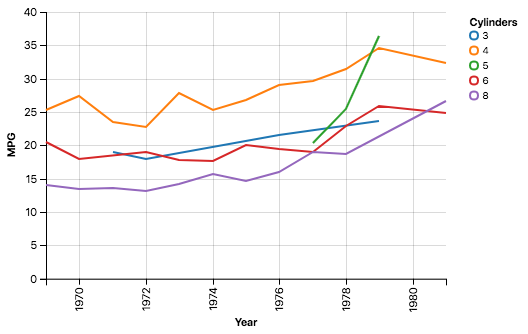

In [12]:
alt.Chart(cars).mark_line().encode(
    alt.X('Year', type='temporal', timeUnit='year', title='Year'),
    alt.Y('average(Miles_per_Gallon)', type='quantitative', title='MPG'),
    alt.Color('Cylinders', type='nominal')
)

To make it easy to specify data types, Altair accepts a shorthand notation for the column names that allows you to postfix a single character at the end of the column name to indicate the data type:

![](images/column_syntax1.png)

Here is the same chart as above using this shorthand notation.

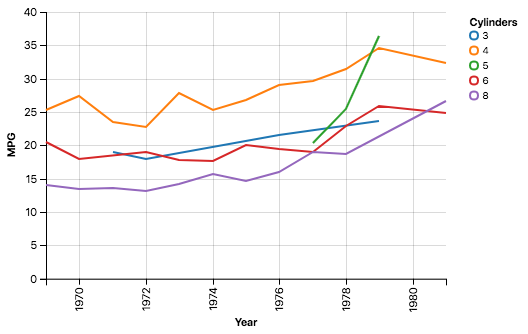

In [13]:
alt.Chart(cars).mark_line().encode(
    alt.X('Year:T', timeUnit='year', title='Year'),
    alt.Y('average(Miles_per_Gallon):Q', title='MPG'),
    alt.Color('Cylinders:N')
)

It is important to remember that specifying the data type is optional; in most cases Altair can guess the right data type to use for a given column.